In [ ]:
!git clone https://github.com/maryhc/opinion.git
#%cd /content
#!git pull

Cloning into 'opinion'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 52 (delta 25), reused 41 (delta 14), pack-reused 0
Unpacking objects: 100% (52/52), done.


In [ ]:
import re, string, unicodedata
import nltk
from nltk import FreqDist
from nltk.util import ngrams
nltk.download('book')
from nltk.book import *
nltk.download('punkt')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package dependency_treebank is already up-to-date!
[nltk_data]    | Downloadi

In [ ]:
#file_name = open('/content/opinion/corpus/tweets.txt').read()
#file_name_mod = file_name.replace(".txt","")
file_name_mod = "tweetsn.txt"
mod_file = open(file_name_mod,"w")
raw_file = open('/content/opinion/corpus/tweets.txt').read()

for x in raw_file:
		xf = x.replace("!"," ")
		xf = x.lower()
		mod_file.write(xf)

In [ ]:
def remove_non_ascii(words):
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words      

In [ ]:
sample = open('/content/tweetsn.txt').read()
words = nltk.word_tokenize(sample)
words = remove_non_ascii(words)
#sample
md_bigrams = list(bigrams(words))
fdist = FreqDist(md_bigrams)

In [ ]:
fdist.most_common(10)

[(('de', 'la'), 797),
 (('a', 'la'), 494),
 (('lo', 'que'), 460),
 (('en', 'el'), 458),
 (('que', 'no'), 431),
 (('!', '!'), 407),
 (('de', 'los'), 355),
 (('a', 'los'), 347),
 (('que', 'se'), 322),
 (('en', 'la'), 288)]

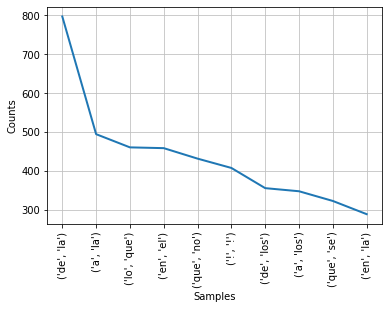

In [ ]:
fdist.plot(10)

In [ ]:
#bigramas
threshold = 2
filtered_bigrams = [bigram for bigram in md_bigrams if len(bigram[0])>threshold and len(bigram[1])>threshold]
filtered_bigrams_dist = FreqDist(filtered_bigrams)

filtered_palabras = [palabra for palabra in words if len(palabra) > threshold]
filtered_palabra_dist = FreqDist(filtered_palabras)

df = pd.DataFrame()
df['bi_gramas'] = list(set(filtered_bigrams))
df['palabra_0'] = df['bi_gramas'].apply(lambda x: x[0])
df['palabra_1'] = df['bi_gramas'].apply(lambda x: x[1])
df['bi_gram_freq'] = df['bi_gramas'].apply(lambda x: filtered_bigrams_dist[x])
df['palabra_0_freq'] = df['palabra_0'].apply(lambda x: filtered_palabra_dist[x])
df['palabra_1_freq'] = df['palabra_1'].apply(lambda x: filtered_palabra_dist[x])

In [ ]:
df['PMI'] = df[['bi_gram_freq','palabra_0_freq','palabra_1_freq']].apply(lambda x: np.log2(x.values[0]/(x.values[1]*x.values[2])), axis = 1)
df['log(bi_gram_freq)'] = df['bi_gram_freq'].apply(lambda x: np.log2(x))
df

,bi_gramas,palabra_0,palabra_1,bi_gram_freq,palabra_0_freq,palabra_1_freq,PMI,log(bi_gram_freq)
0,"(por, perpetrarse)",por,perpetrarse,1,1910,1,-10.899357,0.000000
1,"(infradotado, mental)",infradotado,mental,1,1,18,-4.169925,0.000000
2,"(siempre, funciona)",siempre,funciona,1,204,6,-10.257388,0.000000
3,"(para, bajar)",para,bajar,2,1420,5,-11.793603,1.000000
4,"(por, lula)",por,lula,1,1910,15,-14.806248,0.000000
...,...,...,...,...,...,...,...,...
55665,"(puede, estirar)",puede,estirar,1,165,2,-8.366322,0.000000
55666,"(para, sacarnos)",para,sacarnos,1,1420,4,-12.471675,0.000000
55667,"(vision, hacia)",vision,hacia,1,6,38,-7.832890,0.000000
55668,"(como, todo)",como,todo,14,1171,451,-15.203154,3.807355


In [ ]:
fig = px.scatter(x = df['PMI'].values,y = df['log(bi_gram_freq)'], color = df['PMI'] + df['log(bi_gram_freq)'],
                 hover_name = df['bi_gramas'], width= 600, height= 600, labels = {'x':'PMI', 'y':'Log(Bigram frecuencia)'})
fig.show()

In [ ]:
#Mdidas preconsrtuidas
from nltk.collocations import *
bigram_measure = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(words)

In [ ]:
finder.apply_freq_filter(20)
finder.nbest(bigram_measure.pmi, 10) 

[('lesa', 'humanidad'),
 ('america', 'latina'),
 ('derechos', 'humanos'),
 ('aerea', 'mexicana'),
 ('guerra', 'civil'),
 ('fuerza', 'aerea'),
 ('ja', 'ja'),
 ('carlos', 'mesa'),
 ('algun', 'dia'),
 ('puede', 'esperar')]